# WHAT MAKES A COUNTRY HAPPY? 

In [2]:
## for data preprocessing
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [43]:
## for data visualization
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns

### Data Import

In [4]:
world_happiness_2022 = pd.read_csv('/Users/ellypham/Downloads/archive/2022.csv') # world happiness 2022
world_happiness_2021 = pd.read_csv('/Users/ellypham/Downloads/archive/2021.csv') # for 2021
world_happiness_2020 = pd.read_csv('/Users/ellypham/Downloads/archive/2020.csv') # for 2020
world_happiness_2019 = pd.read_csv('/Users/ellypham/Downloads/archive/2019.csv') # for 2019
world_happiness_2018 = pd.read_csv('/Users/ellypham/Downloads/archive/2018.csv') # for 2018
world_happiness_2017 = pd.read_csv('/Users/ellypham/Downloads/archive/2017.csv') # for 2017
world_happiness_2016 = pd.read_csv('/Users/ellypham/Downloads/archive/2016.csv') # for 2016
world_happiness_2015 = pd.read_csv('/Users/ellypham/Downloads/archive/2015.csv') # for 2015

### Data Cleaning

#### Understanding data

In [27]:
world_happiness_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [26]:
world_happiness_2022.shape

(146, 12)

In [11]:
world_happiness_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [13]:
# Categorical field: 147 countries such as Finland, Denmark, Algeria, etc
pd.value_counts(world_happiness_2022['Country'])

Finland        1
Iran           1
Bangladesh     1
Laos           1
Algeria        1
              ..
Kuwait*        1
Hungary        1
Mauritius      1
Uzbekistan     1
Afghanistan    1
Name: Country, Length: 146, dtype: int64

We are examining the world happiness 2022 data. This data set contains 146 rows and 11 columns. 
There is 1 categorical field which is Country, and 11 numerical fields. These following factors 
are reported in the data sets that may influence the happiness ranking of a country. 

The definition of the factors:
    - GDP per capita: a reflection of such economic health into an individual citizen perspective
    - Social support: tangible and intangible resources that are available to one
    - Healthy life expectancy: the average number of years that one is expected to live in a good health 
    - Freedom to make life choices: the ability to decide or choose things without any constraints 
                                    from external parties
    - Generosity: how kind one to another
    - Perceptions of corruption: the levels of corruption by country



In [78]:
# Rename the fields 
world_happiness_2022 = world_happiness_2022.rename(columns = {'RANK': 'Rank',
                                       'Explained by: GDP per capita': 'GDP per capita',
                                       'Explained by: Social support': 'Social support',
                                       'Explained by: Healthy life expectancy': 'Healthy life expectancy',
                                       'Explained by: Freedom to make life choices': 'Freedom to make life choices',                     
                                       'Explained by: Generosity': 'Generosity',
                                       'Explained by: Perceptions of corruption': 'Perceptions of corruption'})
world_happiness_2022.head()

,Rank,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


##### Now, we check if there are any missing values

In [31]:
world_happiness_2022.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

No null values are found and ready for analysis

### Exploratory Data Analysis

#### The distribution of numerical data

In [25]:
# using descibe() to find out std, mean, min and max, ..
world_happiness_2022.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


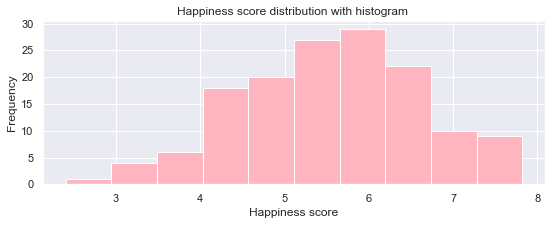

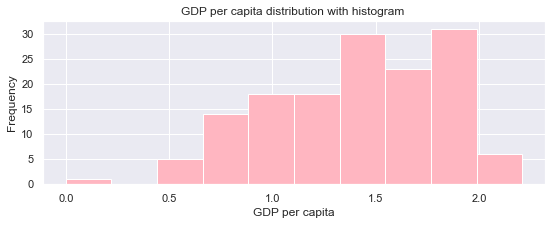

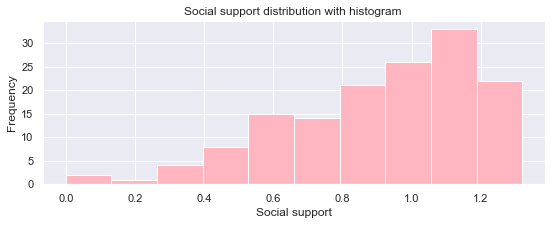

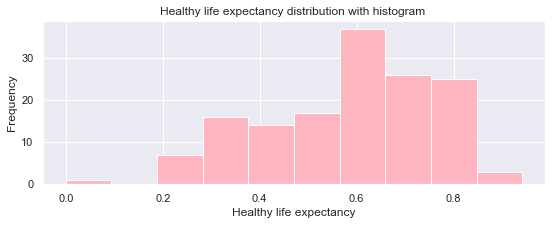

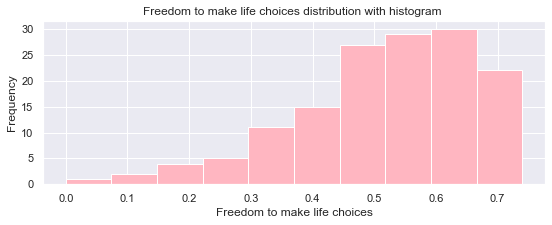

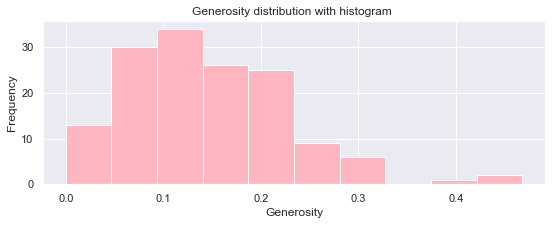

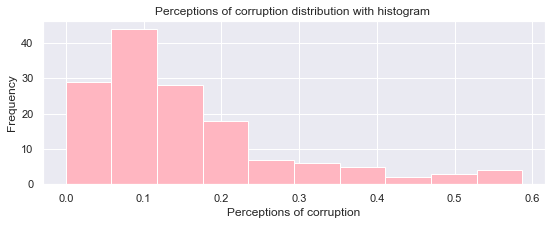

In [170]:
# create a function to visualize numerical data in histogram
def plot_hist(n):
    """
    input : variable ex : "Ladder score"
    output : Hist plot  
    """
   
    plt.figure(figsize=(9,3))
    plt.hist(world_happiness_2022[n], color='lightpink')
    plt.xlabel(n)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram ".format(n))
    plt.show()
    
    # pass the numerical fields in World Happiness 2022 to numericVar object 
numericVar = ["Happiness score", "GDP per capita", "Social support", 
              "Healthy life expectancy", "Freedom to make life choices", 
              "Generosity",  "Perceptions of corruption"]

for n in numericVar:
        plot_hist(n)

There are 146 countries ranging from 1 to 146 based on their happiness score.
- In the happiness score, the score is from a minimum of ~2 to a maximum of ~8. Most of the countries received an average score of 5
- In GDP per capita, we found an outlier where it got 0. However, most of the countries are in the bucket of 1.5 to 2.0
- In Social support, we also found some countries are in the lower tail. However, a lot of the countries are having good social support programs as we see the histogram is left skewed
- In Healthy life expectancy, looks like the majority are having healthy life with a very few that are still struggling 
- In Freedom to make life choices, then we can see the histogram is left-skewed, meaning people now with the freedom to decide on their course
- In Generosity, we found outliers that are at the higher end. However, many countries are ranked from 0 to 0.2 which is the lower
- In Perceptions of corruption, the average score is 0.154781 which is way lower than the max score of 0.587



<AxesSubplot:>

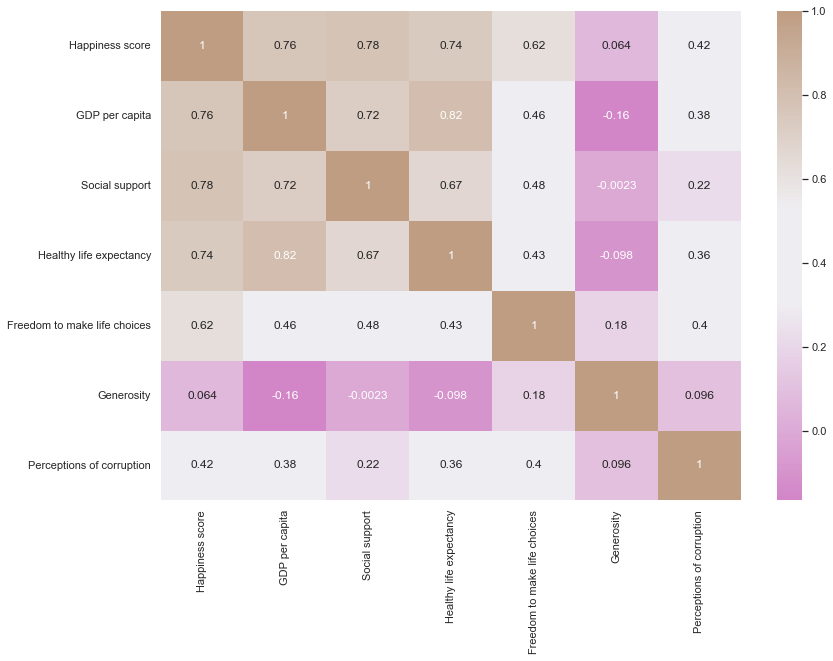

In [181]:
# Correlation of the reported factors in the heat map
cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
plt.figure(figsize=(13, 9))

sns.heatmap(world_happiness_2022[numericVar].corr(), annot=True, cmap=cmap, ec='black', alpha = 0.6)

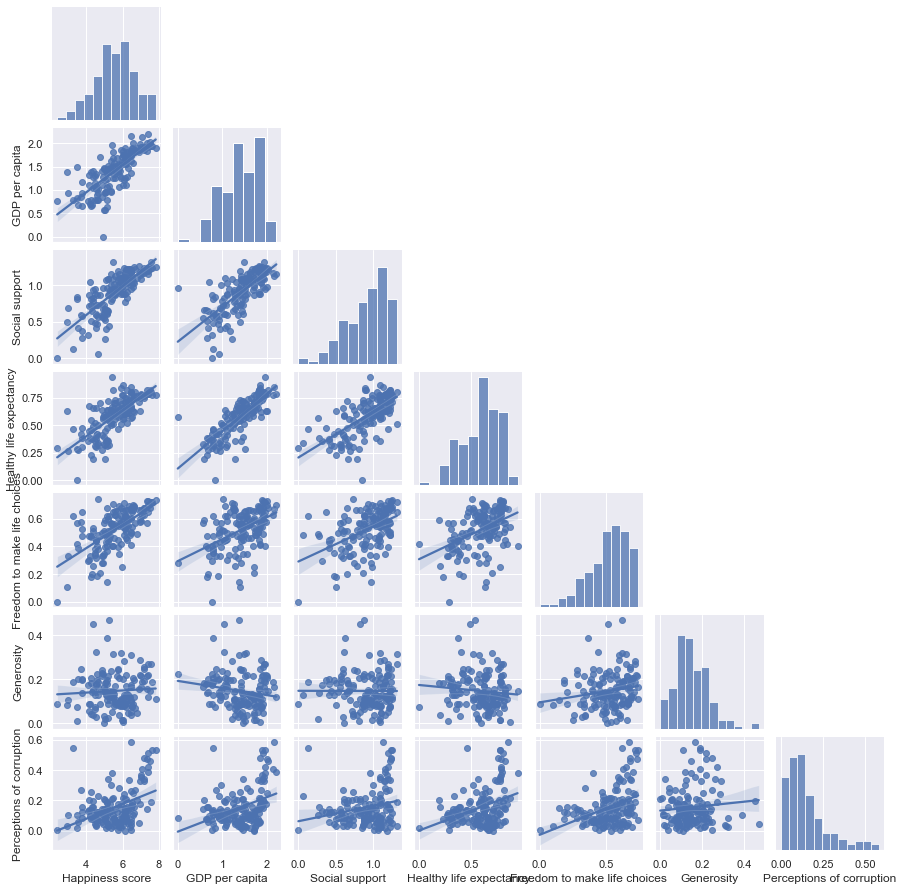

In [177]:
# visualize the correlation in the scatter plot matrix
%config InlineBackend.figure_format = 'png'
sns.set()
sns.pairplot(world_happiness_2022[numericVar], 
            size = 1.8, 
            corner=True,
            kind='reg')
plt.show()

Correlation:
- Happiness score is highly correlated to GDP per capita, Social Support, and Healthy life expectancy. Weak correlation to Generosity
- GDP per capita is moderately correlated to Freedom to make life choices and having a weak correlation with Generosity
- Healthy life expectancy is highly correlated to GDP per capita and having a weak correlation with Generosity
- It is unexpected that Generosity is having a weak correlation to GDP per capita, Social support, and healthy life expectancy

### Exploratory Data Analysis

#### Explore the factors that impact the happiness of a country

In [173]:
# top 15 happiest countries
plotdata = world_happiness_2022[:15]
plotdata = plotdata[['Country', 'GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption']]
plotdata = plotdata.set_index('Country')
plotdata.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,
Finland,1.892,1.258,0.775,0.736,0.109,0.534
Denmark,1.953,1.243,0.777,0.719,0.188,0.532
Iceland,1.936,1.320,0.803,0.718,0.270,0.191
Switzerland,2.026,1.226,0.822,0.677,0.147,0.461
Netherlands,1.945,1.206,0.787,0.651,0.271,0.419


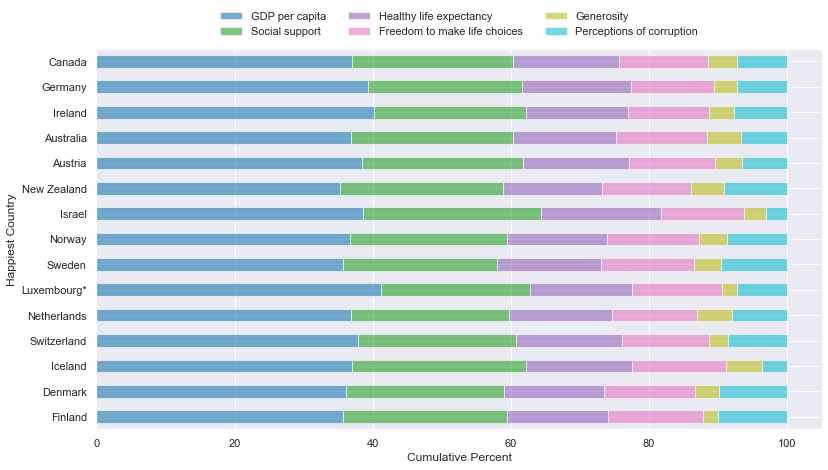

In [178]:
## plot the top 15 happiest contries in stacked bars
plotdata = plotdata.div(plotdata.sum(axis=1), axis=0) * 100
plotdata.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                      alpha = 0.6,
                    figsize=(13, 7))
plt.legend( bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3)
plt.ylabel('Happiest Country')
plt.xlabel('Cumulative Percent')
plt.show()

The visualization shows the estimated contributions of the reported factors to the overall happiness of a country. In the happiest countries, it appears that GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices play the most important roles. 

On another note, the proportion of these factors is almost the same across these happy countries. 

In [81]:
## least 15 happiest countries
least_happiest_countries = world_happiness_2022.sort_values('Happiness score', ascending=True)
least_happiest_countries = least_happiest_countries[:15]
least_happiest_countries = least_happiest_countries[['Country', 'GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption']]
least_happiest_countries = least_happiest_countries.set_index('Country')
least_happiest_countries.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,
Afghanistan,0.758,0.000,0.289,0.000,0.089,0.005
Lebanon,1.392,0.498,0.631,0.103,0.082,0.034
Zimbabwe,0.947,0.690,0.270,0.329,0.106,0.105
Rwanda*,0.785,0.133,0.462,0.621,0.187,0.544
Botswana*,1.503,0.815,0.280,0.571,0.012,0.102


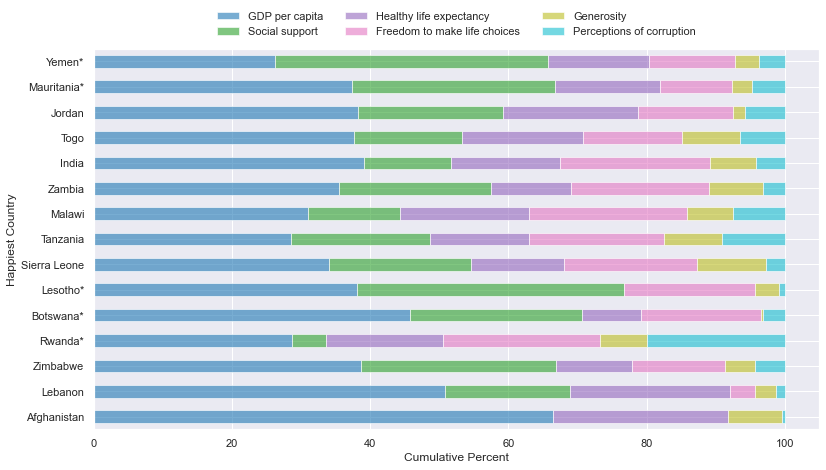

In [179]:
## plot the top 15 happiest contries in stacked bars
least_happiest_countries = least_happiest_countries.div(least_happiest_countries.sum(axis=1), axis=0) * 100
least_happiest_countries.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    alpha = 0.6,
                    figsize=(13, 7))
plt.legend( bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3)
plt.ylabel('Happiest Country')
plt.xlabel('Cumulative Percent')
plt.show()

For the least happy countries, the main three factors that play important roles are also GDP per capita, Social support, and Health life expectancy, Freedom to make life choices. 

Additionally, we discovered the proportion of the reported factors changes and are proportionally different across these countries compared to the top 15 happiest countries which we do not see much. An example, Afghanistan has no social support and Rwanda is not having good social support programs. 

### Predictive Analysis

In [82]:
from sklearn.model_selection import train_test_split # for data splitting 
from sklearn.preprocessing import StandardScaler # for standardization

from sklearn.linear_model import LinearRegression, ElasticNet # for linear regression 
from sklearn.linear_model import Ridge # for ridge linear regresion
from sklearn.tree import DecisionTreeRegressor # for decision tree 
from sklearn.ensemble import RandomForestRegressor # for random forest

from sklearn import metrics # for model evaluation
from sklearn.metrics import mean_squared_error as MSE


In [102]:
# create a new data set for prediction
happiness_prediction = world_happiness_2022.drop(['Country', 'Rank'], axis=1)
happiness_prediction.head()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [103]:
# splitting data for testing and training: 80/20 
# only using the factors that are highly correlated to the happiness score in our model
X = happiness_prediction[['GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices']] #only using numerical data

y = happiness_prediction['Happiness score']

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
# normalize the data using StandardScaler()
scale = StandardScaler()
happiness_prediction = scale.fit_transform(happiness_prediction)

#### Linear Regression algorithm

In [87]:
# create Linear Regression algorithm for prediction
lm = LinearRegression()
lm.fit(X_train, y_train) # fitting the model with the training data set
print("The accuracy on training data for linear regresion model is:", round(lm.score(X_train, y_train) * 100, 1), "%")

The accuracy on training data for linear regresion model is: 76.7 %


In [57]:
# accuracy on testing data
print("The accuracy on testing data for linear regresion model is:", round(lm.score(X_test,y_test) * 100, 1), "%")

The accuracy on testing data for linear regresion model is: 73.5 %


#### Ridge Regression algorithm

In [27]:
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train,y_train)
print('The accuracy on testing data is: ', round(ridge.score(X_train,y_train) * 100, 1), "%")

The accuracy on testing data is:  79.2 %


In [28]:
# ridge regression
print('The accuracy on testing data is: ', round(ridge.score(X_test,y_test) * 100, 1), "%")

The accuracy on testing data is:  66.5 %


#### Decision Tree algorithm

In [34]:
# decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print("The accuracy on testing data is ", round(dt.score(X_train, y_train) * 100, 1), "%")

The accuracy on testing data is  100.0 %


In [35]:
# prediction using decision tree model
print("The accuracy on testing data is ", round(dt.score(X_test,y_test) * 100, 1), "%")

The accuracy on testing data is  52.7 %


#### Random Forest algorithm

In [39]:
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
print("The accuracy on testing data is ",round(rf.score(X_train,y_train) * 100, 1), "%")

The accuracy on testing data is  96.9 %


In [40]:
print("The accuracy on testing data is ",round(rf.score(X_test,y_test) * 100, 1), "%")

The accuracy on testing data is  69.3 %


After training the data using the different algorithms, Linear Regression is the choosen one to deploy for production. 

Linear Regresion has the highest accuracy in the testing data in comparison with other models such as Random Forest, Decision Tree, or Ridge Regression; additionally, the testing accuracy is closed to the accuracy value on the training data. That implied that there seems to be no overfitting issue or underfitting issue for this model. 

### Model Deployment and Evaluation

In [99]:
# using the regression model for prediction on testing data
y_pred = lm.predict(X_test)
# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred.head(10)

,Actual,Predicted
7,7.365,6.973410
24,6.523,6.265596
27,6.477,6.120324
119,4.516,4.913627
142,3.268,4.295843
51,6.071,6.021258
43,6.172,6.059245
22,6.582,6.344790
112,4.670,4.167339
26,6.480,6.920080


In [110]:
# evaluating the mode; using RMSE
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.5865869619017048


We might need to perform hyperparameter tuning for this model to achieve a better result given that the RMSE value is still relatively high (it is better if RMSE is closer to 0).

In [91]:
# examine the coefficients
coefficient = lm.coef_
coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,GDP per capita,0.532807
1,Social support,1.208847
2,Healthy life expectancy,1.554837
3,Freedom to make life choices,1.785532


Text(0.5, 0, 'Importance')

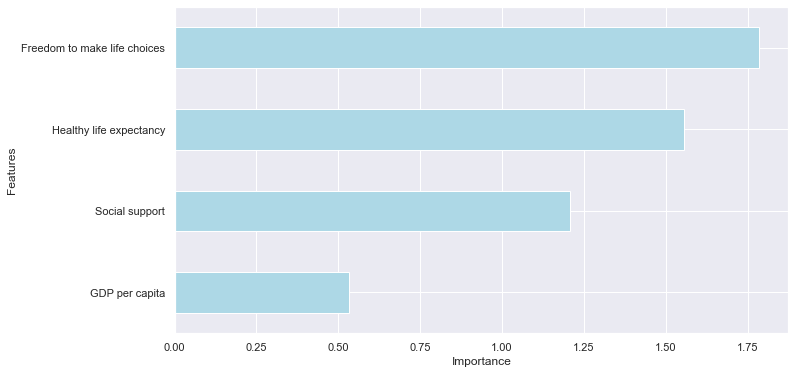

In [161]:
# visualizing the effect of the features 
coeff = list(lm.coef_)
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'lightblue', False: 'red'}))
plt.xlabel('Importance')

It appears that Freedom to make life choices is the most important factor contributing to the country happiness 
followed by Healthy life expectancy, Social support.
GDP per capita seems to be less important than the other factors based on what we found.

### Conclusion

As our life has significantly improved over the past century, it is important for us to pay more attention to the life happiness. This analysis result would ultimately provide a direction for the government in deciding where a country should be heading in the next years to maintain and improve the happiness of their citizen. 

We learned that most of the happiest countries are located in Western Europe, North America, and ANZ area where life is stable since their economy is fully developed and access to public services is fully accessible. On another hand, the least happy countries are located in South Africa and South Asia which often experience instability. 

All of the factors that impact the level of happiness; we found that Freedom to make life choices, healthy life expectancy, Social support, and lastly GDP per capita appear to decide whether a country or region is happier or less. As living conditions have improved across the globe compared to the past, people tend to care more about their rights as a citizen and how they can maintain a healthy life. 

Due to the limited availability of data dimensions, the accuracy of our research can be improved over time as more information is collected. 